# Diamonds v2💎

In [131]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import sidetable

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

#Estandarización
# ==============================================================================
from sklearn.preprocessing import StandardScaler

#Encoding
# ==============================================================================
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#Ajuste modelo
# ==============================================================================
from sklearn.model_selection import train_test_split

#Regresión Lineal
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Árbol Decisión, Random Forest, Decision Tree. 
# ==============================================================================
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor

from tqdm import tqdm


In [79]:
df = pd.read_csv("../../data/train.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [80]:
df= df.drop(["id","x","y","z"], axis=1)

In [81]:
columnas_numeric = df.drop(["price"], axis=1).select_dtypes(include = np.number)
columnas_numeric

,carat,depth,table
0,0.30,62.4,58.0
1,1.01,62.7,56.0
2,0.72,61.8,59.0
3,1.08,63.2,57.0
4,0.36,62.3,59.0
...,...,...,...
40450,0.42,62.1,59.0
40451,0.53,62.0,58.0
40452,0.80,62.8,58.0
40453,1.01,61.5,57.0


### Outliers 

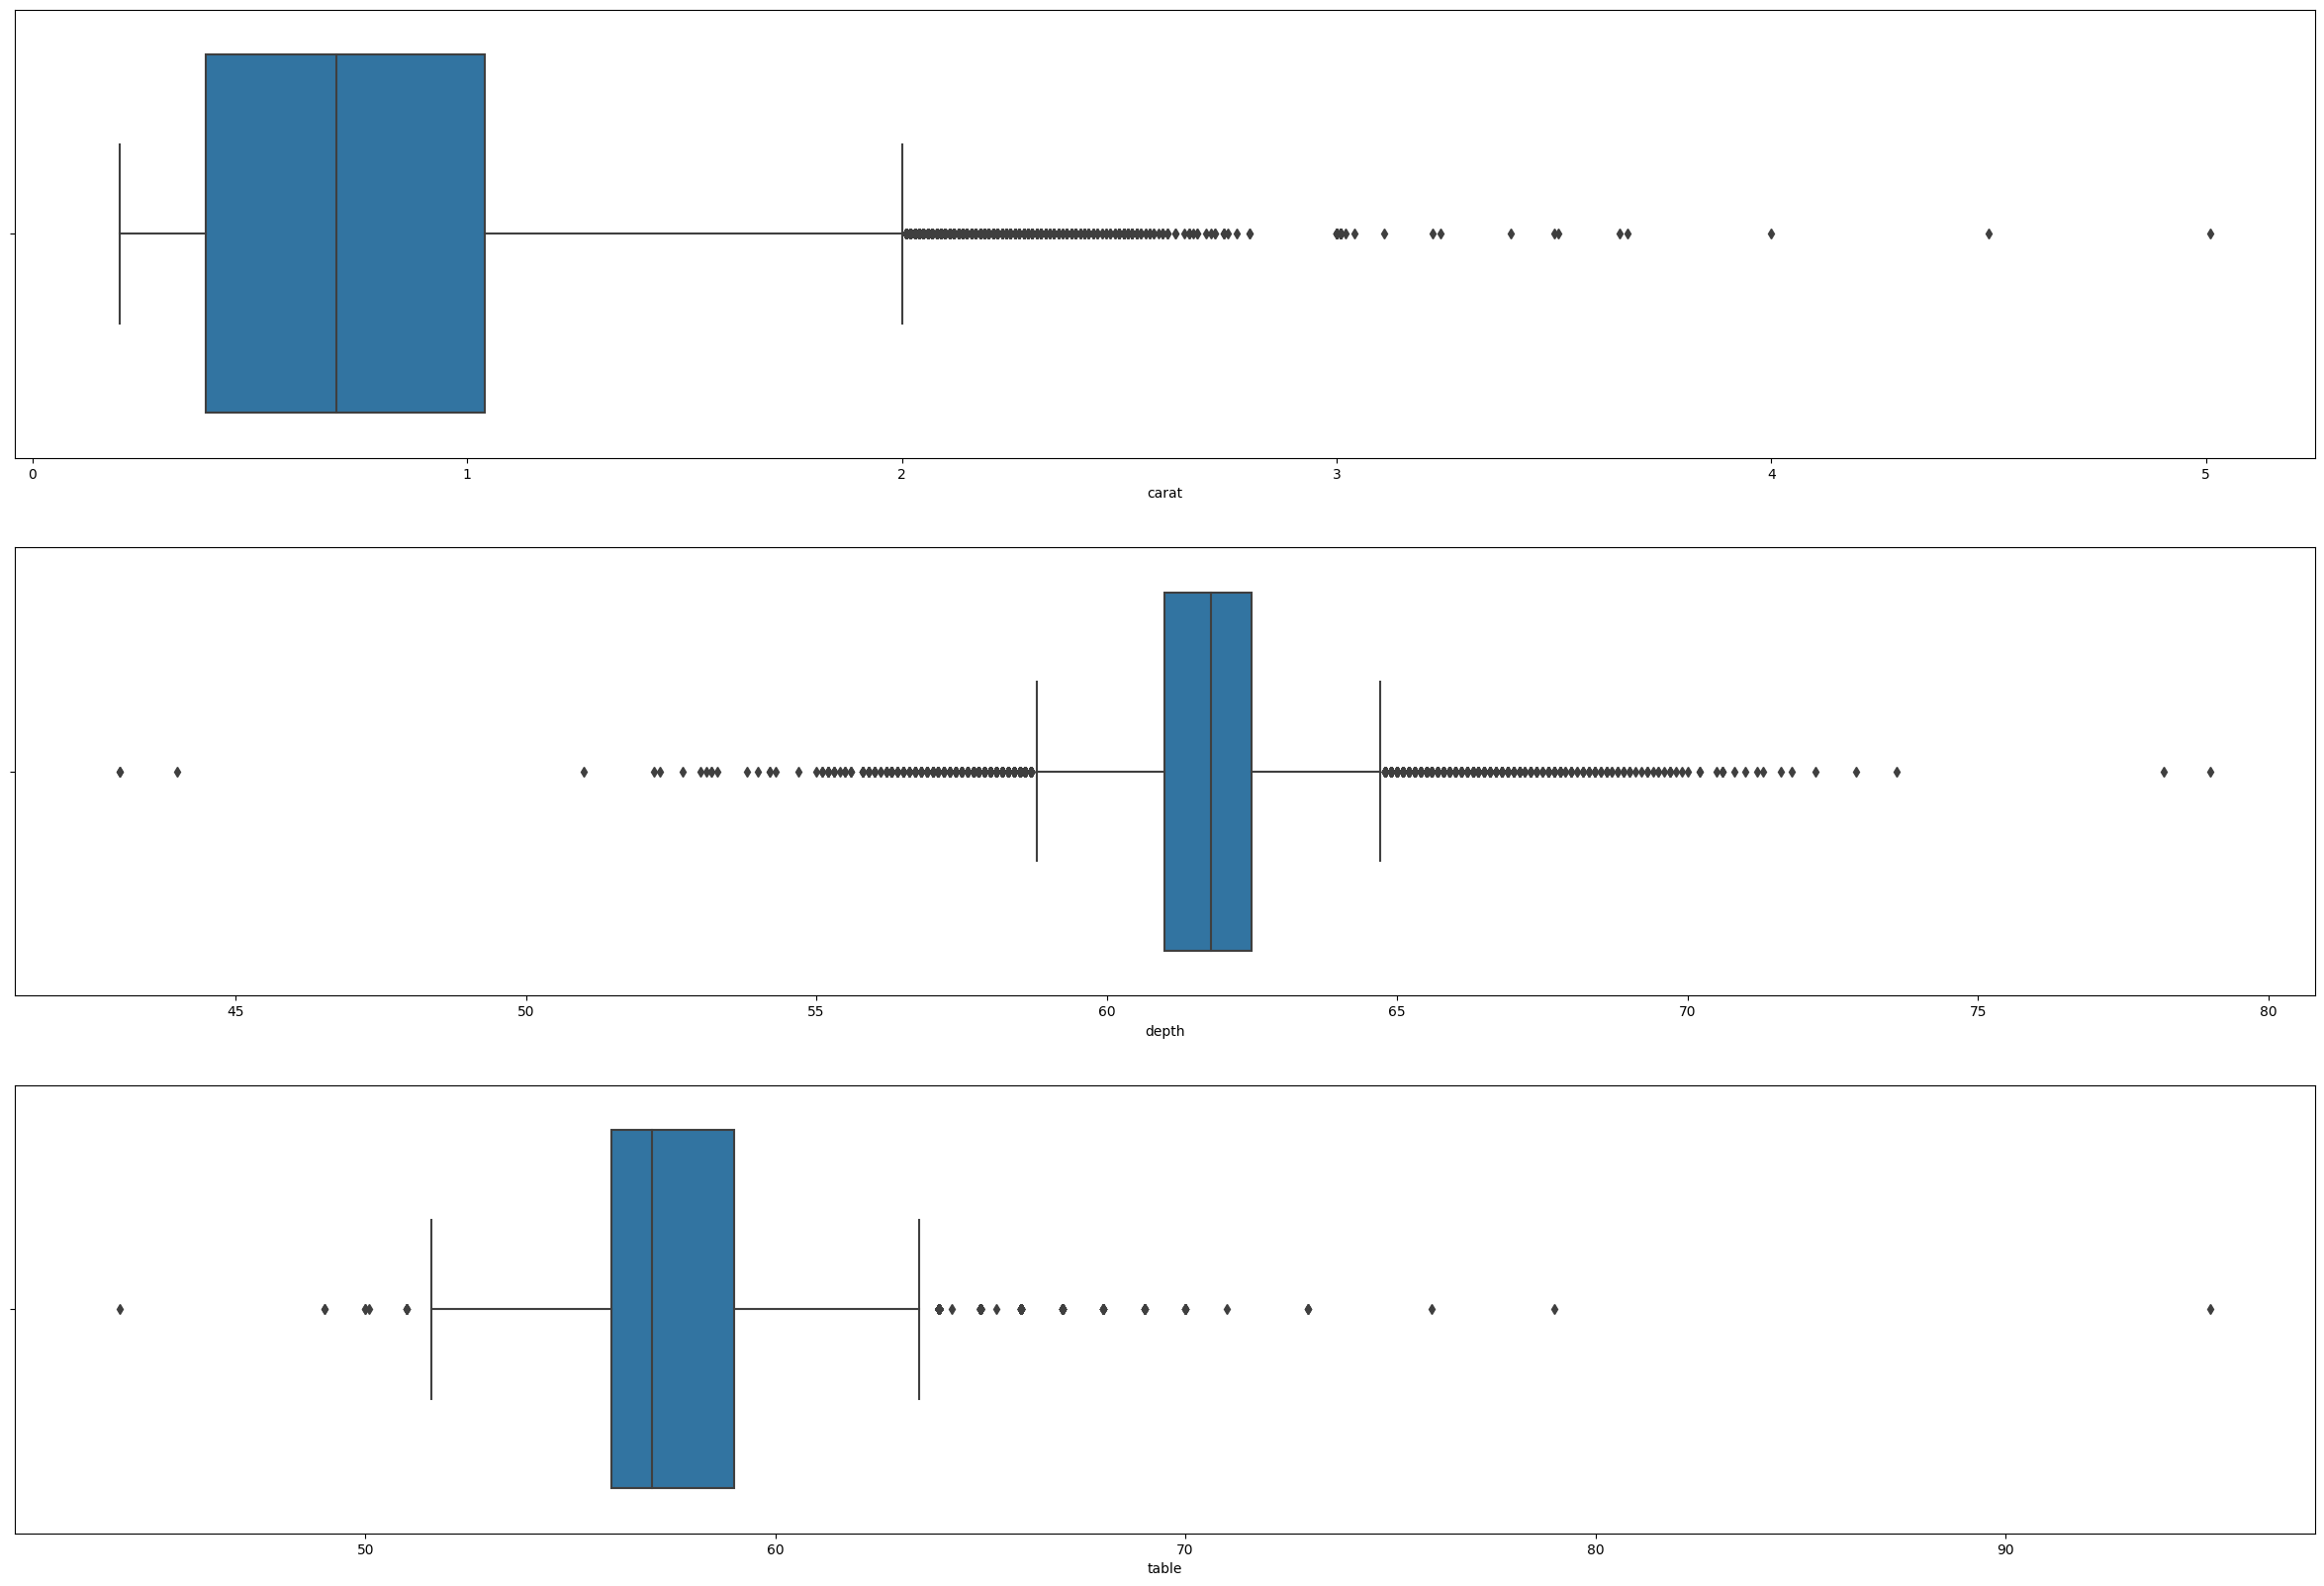

In [142]:
fig, ax = plt.subplots(3, 1, figsize=(30,20))

for i in range(len(columnas_numeric.columns)):
    sns.boxplot(x=columnas_numeric.columns[i], data=columnas_numeric, ax=ax[i])
plt.show()

In [143]:
def detectar_outliers_Q1(lista_columnas, dataframe): 
    
    dicc_indices_Q1 = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data_Q1 = dataframe[(dataframe[col] < Q1 - outlier_step)]
        
        
        if outliers_data_Q1.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices_Q1[col] = (list(outliers_data_Q1.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices_Q1

In [144]:
def detectar_outliers_Q3(lista_columnas, dataframe): 
    
    dicc_indices_Q3 = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data_Q3 = dataframe[(dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data_Q3.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices_Q3[col] = (list(outliers_data_Q3.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices_Q3

In [145]:
lista_numericas= columnas_numeric.columns
lista_numericas

Index(['carat', 'depth', 'table'], dtype='object')

In [146]:
q1= detectar_outliers_Q1(lista_numericas, df)

In [147]:
q3= detectar_outliers_Q3(lista_numericas, df)

In [148]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in q1.items():
    Q1 = np.nanpercentile(df[k], 25) # calculamos el Q1 para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = Q1 

In [149]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in q3.items():
    Q3 = np.nanpercentile(df[k], 75) # calculamos el Q3 para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = Q3 

### Estandarización 

In [90]:
lista_numericas= columnas_numeric.columns
lista_numericas

Index(['carat', 'depth', 'table'], dtype='object')

In [91]:
# iniciamos el método para escalar

scaler = StandardScaler()

In [92]:
# ajustamos nuestros datos

scaler.fit(df[lista_numericas])

StandardScaler()

In [93]:
# transformamos los datos. 

X_escaladas = scaler.transform(df[lista_numericas])
X_escaladas

array([[-1.1478193 ,  0.57312394,  0.2969832 ],
       [ 0.63307853,  0.84474152, -0.66964433],
       [-0.09433044,  0.02988879,  0.78029696],
       ...,
       [ 0.1063341 ,  0.93528071,  0.2969832 ],
       [ 0.63307853, -0.24172879, -0.18633057],
       [ 1.36048751, -1.50927749,  0.2969832 ]])

In [94]:
df[lista_numericas] = X_escaladas
df.head()

,carat,cut,color,clarity,depth,table,price
0,-1.147819,Premium,D,SI2,0.573124,0.296983,6.353
1,0.633079,Ideal,E,VVS2,0.844742,-0.669644,9.183
2,-0.094330,Ideal,F,VS2,0.029889,0.780297,7.983
3,0.808660,Very Good,G,SI2,1.297437,-0.186331,8.371
4,-0.997321,Premium,G,VS1,0.482585,0.780297,6.588


In [95]:
# guardamos el escaler en un pickle

import pickle

with open('../../data/estandarizacion1.pkl', 'wb') as s:
    pickle.dump(scaler, s)

### Encoding 

In [96]:
df.select_dtypes(include=np.object).columns

/var/folders/8l/zm2f15815wb7zxjgwnj0zkjh0000gn/T/ipykernel_1514/1160358068.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.select_dtypes(include=np.object).columns


Index(['cut', 'color', 'clarity'], dtype='object')

In [97]:
# Chequeamos valores únicos

print('Cut has', df['cut'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Color has', df['color'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Clarity has', df['clarity'].unique(), 'categories')

Cut has ['Premium' 'Ideal' 'Very Good' 'Fair' 'Good'] categories
---------------------------------------------------------------------------
Color has ['D' 'E' 'F' 'G' 'H' 'I' 'J'] categories
---------------------------------------------------------------------------
Clarity has ['SI2' 'VVS2' 'VS2' 'VS1' 'SI1' 'VVS1' 'IF' 'I1'] categories


In [98]:
orden_cut = ['Fair','Good','Very Good','Ideal','Premium']
orden_color = ["J", "I", "H", "G", "F","E", "D"]
orden_clarity= ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]

In [99]:
def ordinal_encoder(orden, df, columna):
    
    ordinal = OrdinalEncoder(categories = [orden], dtype = int)
    transformados_oe = ordinal.fit_transform(df[[columna]])
    df[columna] = transformados_oe
    
    #with open(f'data/encoding{columna}.pkl', 'wb') as s:
        #pickle.dump(ordinal, s)

    return df

In [100]:
df = ordinal_encoder(orden_cut, df, 'cut')
df = ordinal_encoder(orden_color, df, 'color')
df = ordinal_encoder(orden_clarity, df, 'clarity')

In [101]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,-1.147819,4,6,1,0.573124,0.296983,6.353
1,0.633079,3,5,5,0.844742,-0.669644,9.183
2,-0.094330,3,4,3,0.029889,0.780297,7.983
3,0.808660,2,3,1,1.297437,-0.186331,8.371
4,-0.997321,4,3,4,0.482585,0.780297,6.588


### Ajuste Modelo  

In [102]:
# dividimos el dataset en variables predictoras y respuesta

X = df.drop(["price"], axis = 1) # variables predictoras
y = df["price"] # variable respuesta 

In [103]:
X_train, X_test, y_train, y_test = train_test_split( X , y, test_size = 0.2, random_state = 666)

In [104]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())

Datos de entrenamiento
-----------------------
count    32364.000000
mean         7.780595
std          1.016368
min          5.787000
25%          6.851000
50%          7.773000
75%          8.580000
max          9.842000
Name: price, dtype: float64


In [105]:
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de testeo
-----------------------
count    8091.000000
mean        7.796732
std         1.018629
min         5.820000
25%         6.851000
50%         7.812000
75%         8.583500
max         9.842000
Name: price, dtype: float64


In [108]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


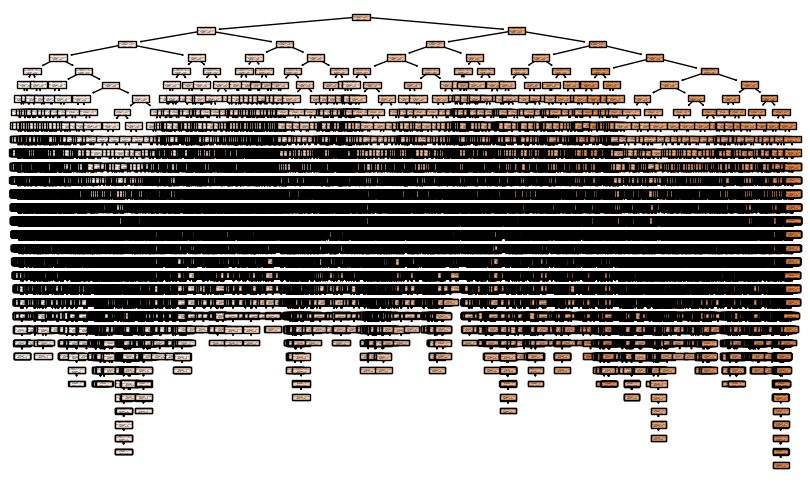

In [109]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

In [110]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

2.449489742783178

In [111]:
# max depth

print(regressor.tree_.max_depth)

33


In [112]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [113]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [114]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.112706,0.032694,0.180816,0.968487,test,Decission Tree I
1,0.012524,0.001674,0.040912,0.998380,train,Decission Tree I


#### Ajustamos Arbol  

In [115]:
depth= list(range(1,34))

In [116]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": depth,
        "min_samples_split": [50, 100, 150, 200],
        "max_features": [1,2]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [117]:
# ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 29.8 µs


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'max_features': [1, 2],
                         'min_samples_split': [50, 100, 150, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [118]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=30, max_features=2, min_samples_split=50)

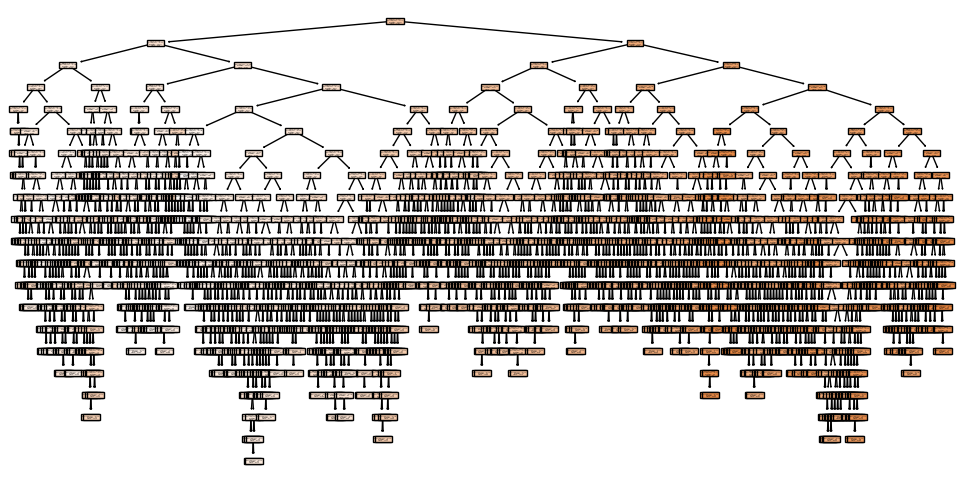

In [119]:
# volvamos a intentar visualizar el árbol a ver como se ve: 

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);

#### Predicción 

In [120]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

In [121]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [122]:
df_all_results = pd.concat([dt_results1, dt_results2])

In [123]:
df_all_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.112706,0.032694,0.180816,0.968487,test,Decission Tree I
1,0.012524,0.001674,0.040912,0.998380,train,Decission Tree I
0,0.116308,0.029581,0.171991,0.971488,test,Decision tree II
1,0.107627,0.025774,0.160544,0.975048,train,Decision tree II


In [139]:
# guardamos el modelo
with open('../../data/modelo1.pkl', 'wb') as modelo:
        pickle.dump(best_tree, modelo)

### Random Forest 

In [124]:
depth2= list(range(1,31))

In [125]:
param = {"max_depth": depth2,
        "min_samples_split": [50, 100, 150, 200,250],
        "max_features": [1,2]}

bosque = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [126]:
%time
bosque.fit(X_train, y_train)

CPU times: user 5 µs, sys: 7 µs, total: 12 µs
Wall time: 40.1 µs


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30],
                         'max_features': [1, 2],
                         'min_samples_split': [50, 100, 150, 200, 250]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [127]:
rf = bosque.best_estimator_
rf

RandomForestRegressor(max_depth=28, max_features=2, min_samples_split=50)

#### Predicción 

In [128]:
y_pred_test_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)


In [129]:
rf_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
rf_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.113144,0.026091,0.161526,0.974852,test,Random Forest
1,0.105429,0.022836,0.151117,0.977893,train,Random Forest


In [130]:
df_all_results = pd.concat([dt_results1, dt_results2, rf_results])
df_all_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.112706,0.032694,0.180816,0.968487,test,Decission Tree I
1,0.012524,0.001674,0.040912,0.998380,train,Decission Tree I
0,0.116308,0.029581,0.171991,0.971488,test,Decision tree II
1,0.107627,0.025774,0.160544,0.975048,train,Decision tree II
0,0.113144,0.026091,0.161526,0.974852,test,Random Forest
1,0.105429,0.022836,0.151117,0.977893,train,Random Forest


In [140]:
# guardamos el modelo
with open('../../data/modelo2.pkl', 'wb') as modelo:
        pickle.dump(rf, modelo)

### Gradient Boosting 

In [134]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": [1,2,3,5,6,8,10],
         "min_samples_split": [50, 100, 150, 200, 250],
         "max_features": [1,2,3,4], 
         "min_samples_leaf": [50, 100, 150, 200, 250]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = GradientBoostingRegressor(),
        param_grid = param,
        n_jobs     = -1,
        verbose    = 1,
        cv         = 10, 
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

Fitting 10 folds for each of 700 candidates, totalling 7000 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 6, 8, 10],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [50, 100, 150, 200, 250],
                         'min_samples_split': [50, 100, 150, 200, 250]},
             return_train_score=True, verbose=1)

In [135]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 50, 'min_samples_split': 50}


#### Predicción 

In [136]:
y_pred_gb_test= grid.predict(X_test)
y_pred_gb_train= grid.predict(X_train)

In [137]:
grid_results = metricas(y_test, y_train, y_pred_gb_test, y_pred_gb_train, "Gradient Boosting")
grid_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.082737,0.016687,0.129179,0.983916,test,Gradient Boosting
1,0.078529,0.015085,0.122821,0.985397,train,Gradient Boosting


In [138]:
df_all_results = pd.concat([dt_results1, dt_results2, rf_results, grid_results])
df_all_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.112706,0.032694,0.180816,0.968487,test,Decission Tree I
1,0.012524,0.001674,0.040912,0.998380,train,Decission Tree I
0,0.116308,0.029581,0.171991,0.971488,test,Decision tree II
1,0.107627,0.025774,0.160544,0.975048,train,Decision tree II
0,0.113144,0.026091,0.161526,0.974852,test,Random Forest
1,0.105429,0.022836,0.151117,0.977893,train,Random Forest
0,0.082737,0.016687,0.129179,0.983916,test,Gradient Boosting
1,0.078529,0.015085,0.122821,0.985397,train,Gradient Boosting


In [141]:
# guardamos el mejor modelo
with open('../../data/mejor_modelo2.pkl', 'wb') as modelo:
        pickle.dump(grid, modelo)